# Wisconsing breast cancer dataset EDA and prediction

The goal of this notebook is to perform an exploratory data analysis on the Wisconsin breast cancer dataset and to build a model to predict whether a tumor is benign or malignant. The dataset contains 30 features and 569 samples. The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

## Loading necessary libraries and the dataset

We start by loading the necessary libraries and the dataset.

To load and manipulate data, we will use `pandas` and `numpy` libraries. For visualization, we will use `matplotlib` and `seaborn`. For building the model, we will use `scikit-learn`. So, a pretty standard set of libraries for a data science project.

To enable some interactivity in the notebook, we will use `ipywidgets` library.

In [47]:
import pandas as pd
import numpy as np
import ipywidgets as ipy

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model
import sklearn.decomposition
import sklearn.model_selection
import sklearn.metrics

import scipy.stats


WISCONSIN_DATASET = "https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/d9d8bc1858a7073cf1c18799d797491e9805ea2b/Classification/Breast%20cancer%20wisconsin.csv"

wisconsin_breast_cancer_data = pd.read_csv(WISCONSIN_DATASET, index_col=[0])

pd.set_option('display.max_columns', wisconsin_breast_cancer_data.shape[1] + 1)
plt.style.use('ggplot')

wisconsin_breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Preliminary look into data

First, a preliminary look into the data is taken i.e. find out how many rows and columns of data are present, are there any missing values, what are the data types of the columns, etc.

In [48]:
print(f"Number of rows: {wisconsin_breast_cancer_data.shape[0]}")
print(f"Number of columns: {wisconsin_breast_cancer_data.shape[1]}")

no_nans_present = np.all(
    wisconsin_breast_cancer_data.isna().sum() == 0
)

print(f"No NaNs present in the dataset: {no_nans_present}")

print(wisconsin_breast_cancer_data.dtypes)

wisconsin_breast_cancer_data.describe()

Number of rows: 569
Number of columns: 32
No NaNs present in the dataset: True
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Clean data

Next, we clean the data. This includes removing any missing values, converting data types, etc.

In case of this dataset, there are no missing values, so we don't need to do anything here.
However, it is always a good practice to check for missing values and handle them if they are present.

In [49]:
print(f"Rows before cleaning: {wisconsin_breast_cancer_data.shape[0]}")

# Drop duplicates
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop_duplicates()

# Drop rows with missing values
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.dropna()

print(f"Rows after cleaning: {wisconsin_breast_cancer_data.shape[0]}")

Rows before cleaning: 569
Rows after cleaning: 569


## Standardize and normalize the data

To let the model perform better, we standardize and normalize the data. This is done to ensure that the model doesn't get biased towards features with higher values.

The **standardization** is done by subtracting the mean and dividing by the standard deviation. This makes the mean of each feature 0 and the standard deviation 1.

The **normalization** is done by scaling the features to lie between 0 and 1 via standard min-max scaling.

Next, the text `diagnosis` is converted to numerical values. `M` is converted to 1 and `B` is converted to 0, using `pandas` one-hot encoding method of `DataFrame` class.
This is further simplified, by using the fact that `benign` is just the opposite of `malignant`, so the former column can be dropped. However, to be sure that no data is lost, we check if there are any columns that have identical values for those columns in case of tumor diagnosis being inconclusive (which could be a possiblity).

Next, a rather radical decision is made - only means of features are kept as measures of their central tendency. This is done to reduce the number of features and to make the model simpler. This is a trade-off between model complexity and accuracy. This is done by dropping all columns that don't have `mean` in their name.

In [50]:
# Remove id column
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop('id', axis=1)

# Get names of columns with numerical data
numerical_columns = wisconsin_breast_cancer_data.select_dtypes(include=[np.number]).columns

# Standardize numerical columns
wisconsin_breast_cancer_data[numerical_columns] = (wisconsin_breast_cancer_data[numerical_columns] - wisconsin_breast_cancer_data[numerical_columns].mean()) / wisconsin_breast_cancer_data[numerical_columns].std()

# Normalize numerical columns
wisconsin_breast_cancer_data[numerical_columns] = (wisconsin_breast_cancer_data[numerical_columns] - wisconsin_breast_cancer_data[numerical_columns].min()) / (wisconsin_breast_cancer_data[numerical_columns].max() - wisconsin_breast_cancer_data[numerical_columns].min())

# One-hot encode categorical columns
wisconsin_breast_cancer_data = pd.get_dummies(wisconsin_breast_cancer_data, columns=['diagnosis'], dtype=int).rename({
    'diagnosis_B': 'benign',
    'diagnosis_M': 'malignant'
}, axis=1)

# Check if there are rows with inclonclusive diagnosis and drop them
inconclusive_diagnosis = wisconsin_breast_cancer_data.query(
    '(benign == 1 and malignant == 1) or (benign == 0 and malignant == 0)'
)

print(f"Rows with inconclusive diagnosis: {inconclusive_diagnosis.shape[0]}")

wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop(inconclusive_diagnosis.index)

# Since malignant = ~benign, we can drop one of the columns
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop('benign', axis=1)
wisconsin_breast_cancer_data

# Drop columns with _se and _worst suffixes
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop(
    wisconsin_breast_cancer_data.filter(like='_se').columns, axis=1
).drop(
    wisconsin_breast_cancer_data.filter(like='_worst').columns, axis=1
)
wisconsin_breast_cancer_data_copy = wisconsin_breast_cancer_data.copy()

Rows with inconclusive diagnosis: 0


For visualization purposes and getting first hints about which features could be important in distribution of benign and malignant tumors, we plot violin plots for each feature, for both diagnosis classes. This very shallow look points to a relationship between the diagnosis and:

* radius / perimeter / area features, so information connected with the size of the tumor
* compactness / concavity / concave points, so information connected with the shape of the tumor

The smoothness / symmetry / fractal dimension features don't seem to be very important in distinguishing between benign and malignant tumors, since their distributions are very similar for both classes (or atleast their quartiles are).

We will keep that in mind when making any further judgements.

In [51]:
def plot_violin_against_diagnosis(feature):
    feature_name = feature.replace('_', ' ').title()
    ax = sns.violinplot(x="malignant", y=feature, data=wisconsin_breast_cancer_data_copy)
    ax.set(title=f"{feature_name} against diagnosis")
    ax.set(xlabel="Is malignant", ylabel=feature_name)

ipy.interact(plot_violin_against_diagnosis, feature=wisconsin_breast_cancer_data_copy.columns.drop('malignant'))

interactive(children=(Dropdown(description='feature', options=('radius_mean', 'texture_mean', 'perimeter_mean'…

<function __main__.plot_violin_against_diagnosis(feature)>

## Check if numerical data distribution is normal

A classic assumption in statistics is that the data is normally distributed. This is important for some statistical tests and for the performance of some models. We will check if the data is normally distributed by graphing histograms of the numerical data columns. The diagnosis graph is also made to quickly see if the data is balanced.

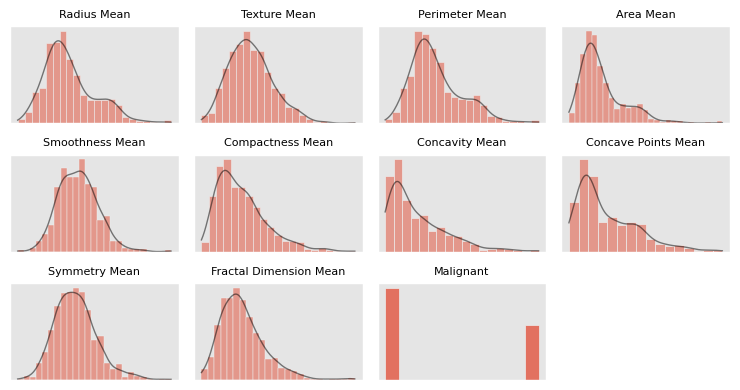

In [52]:
# Plot histograms for each feature)

NUMBER_OF_ROWS = np.sqrt(wisconsin_breast_cancer_data.columns.shape[0]).astype(int)
NUMBER_OF_COLUMNS = np.ceil(wisconsin_breast_cancer_data.columns.shape[0] / NUMBER_OF_ROWS).astype(int)

fig, axes = plt.subplots(NUMBER_OF_ROWS, NUMBER_OF_COLUMNS, figsize=(NUMBER_OF_ROWS * 2.5, NUMBER_OF_COLUMNS), sharex=True)
for i, column in enumerate(wisconsin_breast_cancer_data.columns):
    indices = np.unravel_index(i, (NUMBER_OF_ROWS, NUMBER_OF_COLUMNS))
    sns.histplot(
        wisconsin_breast_cancer_data[column],
        kde=column != 'malignant',
        ax=axes[indices],
    )
    axes[indices].set_title(column.replace('_', ' ').title(), fontsize=8)
    axes[indices].set_xlabel('')
    axes[indices].set_ylabel('')
    axes[indices].set_yticks([])
    axes[indices].set_xticks([])
    if column != 'malignant':
        axes[indices].lines[0].set_color('black')
        axes[indices].lines[0].set_linewidth(1)
        axes[indices].lines[0].set_alpha(0.5)
for i in range(wisconsin_breast_cancer_data.columns.shape[0], NUMBER_OF_ROWS * NUMBER_OF_COLUMNS):
    indices = np.unravel_index(i, (NUMBER_OF_ROWS, NUMBER_OF_COLUMNS))
    fig.delaxes(axes[indices])
fig.tight_layout()

So here we can see that most features are skewed towards the left, meaning that an additional transformation might be necessary to make the data more normally distributed.

Since the distributions are heavily, negatively skewed, we will use the power transformation to make the data more normally distributed. To do this we will use `sklearn` library, more specifically the Box-Cox transformation via `PowerTransformer` class.

## Quantities connected with size i.e. tumor radius

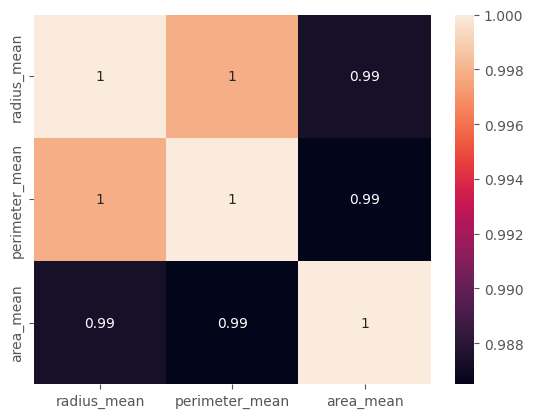

In [ ]:
radius_dependent_features = [
    'radius_mean',
    'perimeter_mean',
    'area_mean'
]

# Checking the correlation between the radius columns
radius_correlation = wisconsin_breast_cancer_data[radius_dependent_features].corr()
radius_correlation_heatmap = sns.heatmap(radius_correlation, annot=True)

# We can safely drop the perimeter and area columns as they are highly correlated with the radius column
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop(columns=['perimeter_mean', 'area_mean'])

## Quantities connected with surface properties

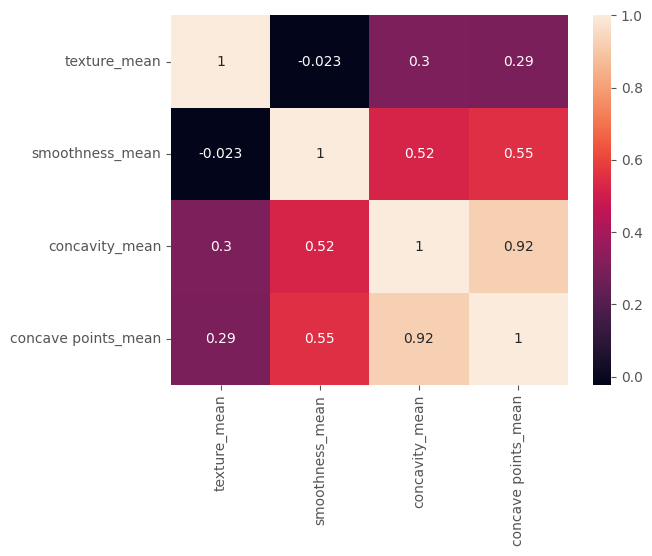

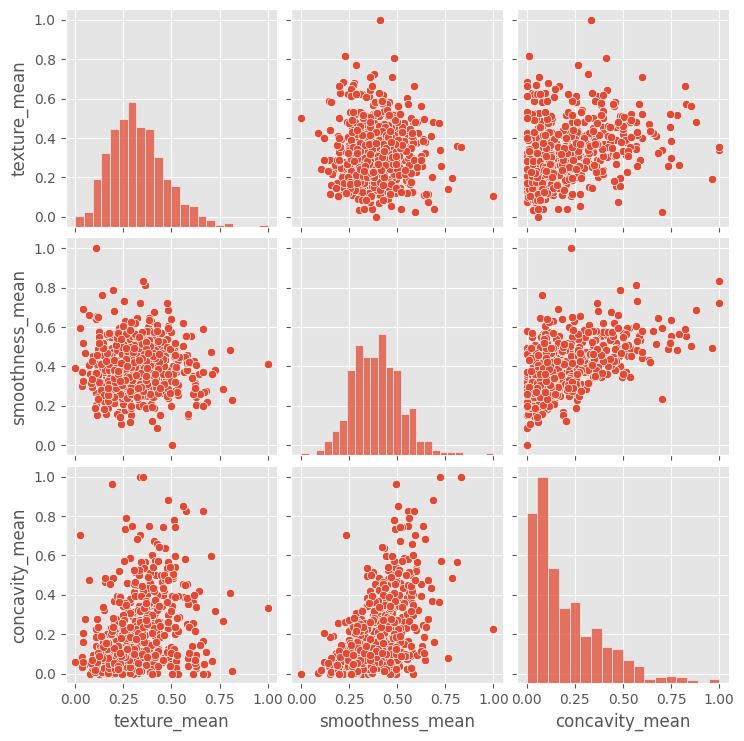

In [ ]:
surface_oriented_features = [
    'texture_mean',
    'smoothness_mean',
    'concavity_mean',
    'concave points_mean'
]

# Checking the correlation between the surface oriented columns

sns.heatmap(wisconsin_breast_cancer_data[surface_oriented_features].corr(), annot=True)

# Concavity and concave points are highly correlated, check the coefficient

concavity_concave_points_correlation = wisconsin_breast_cancer_data[['concavity_mean', 'concave points_mean']].corr()

# We can safely drop the concave points column as it is highly correlated with the concavity column
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop(columns=['concave points_mean'])

# Plotting the pairplot of the surface oriented features

surface_oriented_features.remove('concave points_mean')
sns.pairplot(wisconsin_breast_cancer_data, vars=surface_oriented_features)

In [ ]:
# Checking which properties are left

important_features = wisconsin_breast_cancer_data.columns.str.replace('_mean', '')

all_columns_with_features = wisconsin_breast_cancer_data.columns[
    wisconsin_breast_cancer_data.columns.str.contains('|'.join(important_features)) | wisconsin_breast_cancer_data.columns.str.contains('diagnosis')
]

wisconsin_breast_cancer_data = wisconsin_breast_cancer_data[all_columns_with_features]

## General correlation between quantities

/tmp/ipykernel_83738/1474646354.py:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: 'W' if x < MODERATE_THRESHOLD else 'M' if x < STRONG_THRESHOLD else 'S')


<Axes: >

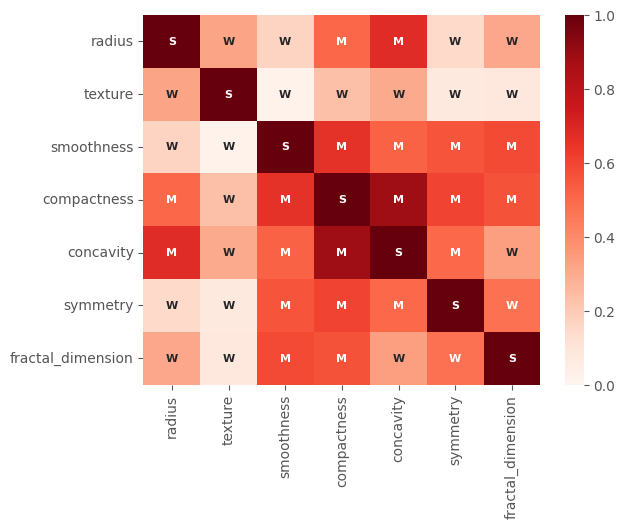

In [ ]:
numeric_values = wisconsin_breast_cancer_data[
    wisconsin_breast_cancer_data.columns[
        wisconsin_breast_cancer_data.columns.str.contains('|'.join(important_features))
    ]
]
means = numeric_values[
    numeric_values.columns[
        numeric_values.columns.str.contains('mean')
    ]
]
means.columns = means.columns.str.replace('_mean', '')

standard_errors = numeric_values[
    numeric_values.columns[
        numeric_values.columns.str.contains('se')
    ]
]
standard_errors.columns = standard_errors.columns.str.replace('_se', '')

worst = numeric_values[
    numeric_values.columns[
        numeric_values.columns.str.contains('worst')
    ]
]
worst.columns = worst.columns.str.replace('_worst', '')

# Showing three heatmaps in one figure

correlation_coefficients = [means.corr(), standard_errors.corr(), worst.corr()]

# Categorize coefficients into three categories: weak, moderate, and strong

MODERATE_THRESHOLD = 0.5
STRONG_THRESHOLD = 0.9

def categorize_coefficients(coefficients: pd.DataFrame) -> pd.DataFrame:
    return coefficients\
        .abs()\
        .applymap(lambda x: 'W' if x < MODERATE_THRESHOLD else 'M' if x < STRONG_THRESHOLD else 'S')

categorized_coefficients = categorize_coefficients(correlation_coefficients[0])
sns.heatmap(
    data=correlation_coefficients[0].abs(),
    fmt = '',
    annot=categorized_coefficients,
    annot_kws={
        "size": 8,
        "weight": "bold"
    },
    cmap='Reds',
    vmin=0.0,
    vmax=1.0
)

In [ ]:
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop(
    columns=wisconsin_breast_cancer_data.columns[
        wisconsin_breast_cancer_data.columns.str.contains('se|worst')
    ]
)
wisconsin_breast_cancer_data

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,malignant
0,0.521037,0.022658,0.593753,0.792037,0.703140,0.686364,0.605518,1
1,0.643144,0.272574,0.289880,0.181768,0.203608,0.379798,0.141323,1
2,0.601496,0.390260,0.514309,0.431017,0.462512,0.509596,0.211247,1
3,0.210090,0.360839,0.811321,0.811361,0.565604,0.776263,1.000000,1
4,0.629893,0.156578,0.430351,0.347893,0.463918,0.378283,0.186816,1
...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.526948,0.296055,0.571462,0.336364,0.132056,1
565,0.622320,0.626987,0.407782,0.257714,0.337395,0.349495,0.113100,1
566,0.455251,0.621238,0.288165,0.254340,0.216753,0.267677,0.137321,1
567,0.644564,0.663510,0.588336,0.790197,0.823336,0.675253,0.425442,1


In [ ]:
# Check the correlation between the features and the diagnosis
correlation_with_diagnosis = wisconsin_breast_cancer_data.corr()['malignant'].abs().sort_values(ascending=False)

# Drop the features with low correlation with the diagnosis
lowly_correlated_features = correlation_with_diagnosis[correlation_with_diagnosis < MODERATE_THRESHOLD].index

wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop(columns=lowly_correlated_features)
wisconsin_breast_cancer_data

,radius_mean,compactness_mean,concavity_mean,malignant
0,0.521037,0.792037,0.703140,1
1,0.643144,0.181768,0.203608,1
2,0.601496,0.431017,0.462512,1
3,0.210090,0.811361,0.565604,1
4,0.629893,0.347893,0.463918,1
...,...,...,...,...
564,0.690000,0.296055,0.571462,1
565,0.622320,0.257714,0.337395,1
566,0.455251,0.254340,0.216753,1
567,0.644564,0.790197,0.823336,1


## Permutation tests

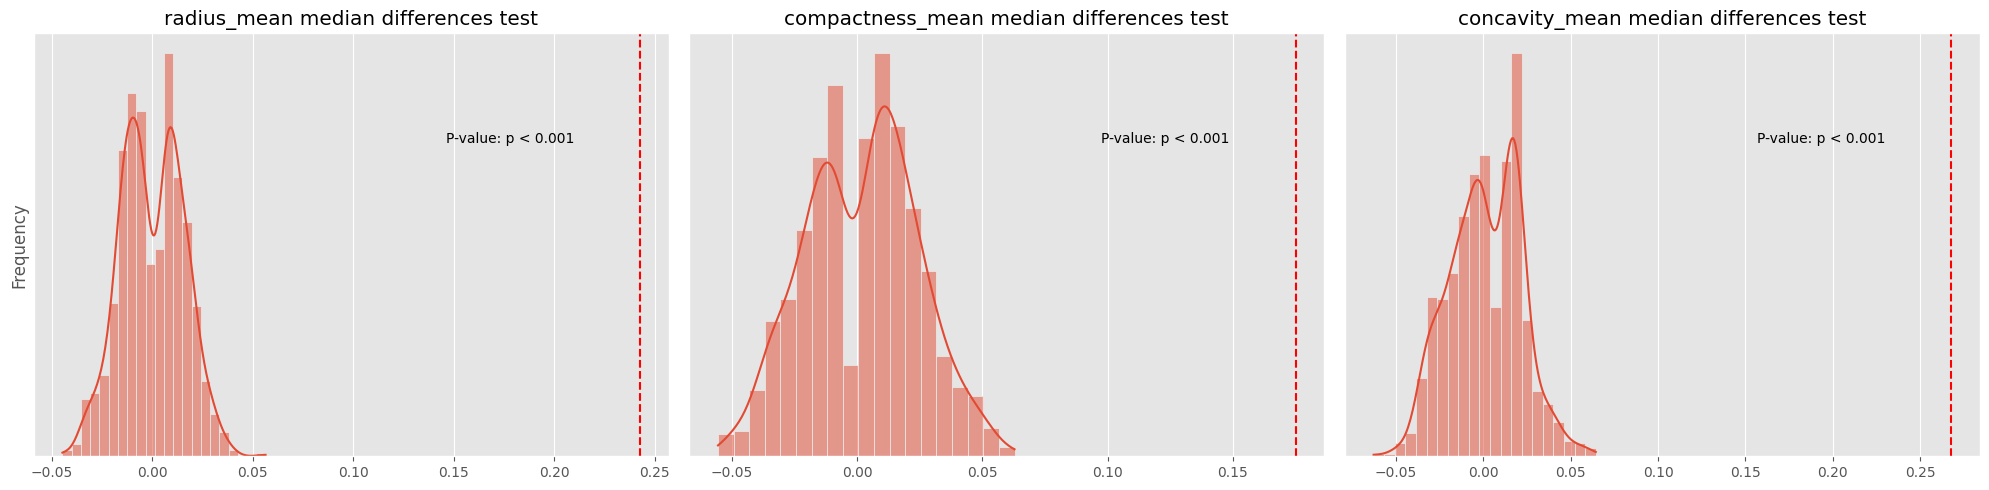

In [ ]:
number_of_permutations = 1000
columns_without_diagnosis = wisconsin_breast_cancer_data.columns.drop('malignant')

observed_malignant_medians = wisconsin_breast_cancer_data.query('malignant == 1')[columns_without_diagnosis].median()
observed_benign_medians = wisconsin_breast_cancer_data.query('malignant == 0')[columns_without_diagnosis].median()
number_of_observations_to_sample = wisconsin_breast_cancer_data.query('malignant == 1').shape[0]

# Calculate the observed medians
observed_medians_differences = observed_malignant_medians - observed_benign_medians

calculated_median_differences = {
    f'{column}_median': []
    for column in columns_without_diagnosis
}
for _ in range(number_of_permutations):
    pseudo_malignant_samples = wisconsin_breast_cancer_data.sample(
        n=number_of_observations_to_sample, replace=False
    )
    pseudo_benign_samples = wisconsin_breast_cancer_data.drop(pseudo_malignant_samples.index)
    permutation_medians = pseudo_malignant_samples[columns_without_diagnosis].median() - pseudo_benign_samples[columns_without_diagnosis].median()
    for column in columns_without_diagnosis:
        calculated_median_differences[f'{column}_median'].append(permutation_medians[column])

# Plot the observed medians and the calculated medians
fig, axes = plt.subplots(1, len(columns_without_diagnosis), figsize=(20, 5))
for i, column in enumerate(columns_without_diagnosis):
    sns.histplot(calculated_median_differences[f'{column}_median'], kde=True, ax=axes[i])
    axes[i].axvline(observed_medians_differences[column], color='red', linestyle='--')
    axes[i].set_title(f'{column} median differences test')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_yticks([])
    p_value = (
        np.sum(calculated_median_differences[f'{column}_median'] >= observed_medians_differences[column])
    ) / number_of_permutations
    axes[i].text(
        0.75, 0.75,
        f'P-value: {p_value:.4f}' if p_value >= 0.001 else 'P-value: p < 0.001',
        horizontalalignment='center',
        verticalalignment='center',
        transform=axes[i].transAxes
    )
axes[0].set_ylabel('Frequency')
fig.tight_layout()

## Dimensionality reduction

In [ ]:
train_data, test_data = sklearn.model_selection.train_test_split(wisconsin_breast_cancer_data, test_size=0.1)

features = train_data.drop('malignant', axis=1)

pca_model = sklearn.decomposition.PCA(n_components='mle', svd_solver='full')
pca_features = pca_model.fit_transform(features)
pca_features = pd.DataFrame(pca_features, columns=[
    f'PC{i + 1}' for i in range(pca_features.shape[1])
], index=train_data.index)

reduced_train_data = pd.concat([pca_features, train_data['malignant']], axis=1)
reduced_train_data

,PC1,PC2,malignant
557,-0.342400,0.059685,0
392,0.277582,0.073079,1
160,-0.071498,0.098900,0
21,-0.268103,0.094112,0
137,-0.207903,0.026169,0
...,...,...,...
338,-0.248409,0.082989,0
351,0.580591,0.235252,1
567,0.856887,0.133482,1
408,0.183104,-0.099479,1


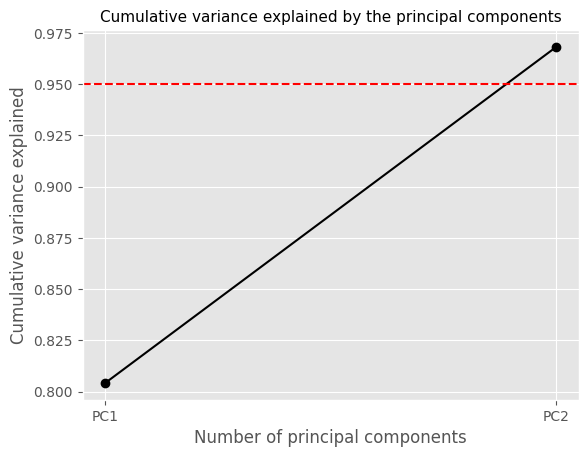

Number of principal components that explain 95.00% of the variance: 2


In [ ]:
# Plot cumulative variance explained by the principal components

CUMULATIVE_VARIANCE_THRESHOLD = 0.95

cumulative_variance_explained = pd.Series(np.cumsum(pca_model.explained_variance_ratio_), index=pca_features.columns)
plt.plot(cumulative_variance_explained, color='black', marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.title('Cumulative variance explained by the principal components', fontsize=11)
plt.axhline(CUMULATIVE_VARIANCE_THRESHOLD, color='red', linestyle='--')
plt.show()

# Get the number of principal components that explain the target variance
number_of_principal_components = cumulative_variance_explained[cumulative_variance_explained < CUMULATIVE_VARIANCE_THRESHOLD].shape[0] + 1
print(f"Number of principal components that explain {CUMULATIVE_VARIANCE_THRESHOLD * 100:.2f}% of the variance: {number_of_principal_components}")

Text(0.5, 1.02, 'Principal components against each other')

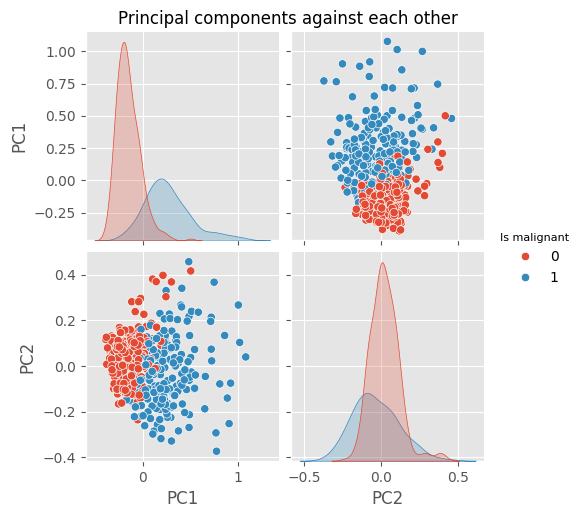

In [ ]:
# Plot principal components against each other
reduced_train_data = pd.concat([pca_features.iloc[:, :number_of_principal_components], train_data['malignant']], axis=1)
ax = sns.pairplot(reduced_train_data, hue='malignant')
ax.legend.set_title('Is malignant', prop={'size': 8})
ax.figure.suptitle('Principal components against each other', y=1.02)

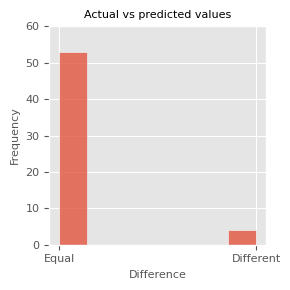

In [ ]:
# Train a logistic regression model
logistic_regression_model = sklearn.linear_model.LogisticRegression()
logistic_regression_model.fit(reduced_train_data.iloc[:, :number_of_principal_components], reduced_train_data['malignant'])

# Test the model

## Transform the test data
test_features = test_data.drop('malignant', axis=1)
test_pca_features = pca_model.transform(test_features)

## Remove unnecessary principal components
test_pca_features = pd.DataFrame(test_pca_features, columns=pca_features.columns, index=test_data.index)
test_pca_features = test_pca_features.iloc[:, :number_of_principal_components]

## Predict the test data
predicted_test_data = logistic_regression_model.predict(test_pca_features)

# Show actual and predicted values
actual_vs_predicted = pd.Series(
    abs(test_data['malignant'] - predicted_test_data),
    name='Actual vs predicted'
)

# Plot the predicted vs actual values
fig = plt.figure(figsize=(3, 3))
ax = sns.histplot(actual_vs_predicted, kde=False)
ax.set_title('Actual vs predicted values', fontsize=8)
ax.set_xlabel('Difference', fontdict={'size': 8})
ax.set_ylabel('Frequency', fontdict={'size': 8})
ax.set_xticks([0, 1])
ax.set_xticklabels(['Equal', 'Different'], fontdict={'size': 8})
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticks().astype(int), fontdict={'size': 8})
fig.tight_layout()

Accuracy of the model: 92.98%


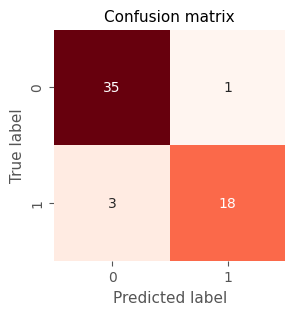

In [ ]:
# Plot the confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(test_data['malignant'], predicted_test_data)
fig = plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, square=True)
plt.xlabel('Predicted label', fontsize=11)
plt.ylabel('True label', fontsize=11)
plt.title('Confusion matrix', fontsize=11)

# Calculate the accuracy of the model
accuracy = np.mean(predicted_test_data == test_data['malignant'])
print(f"Accuracy of the model: {accuracy * 100:.2f}%")